In [1]:
import pandas as pd
import numpy as np

In [2]:
## Visualize the output ##
import geopandas as gpd
import pandas as pd
import numpy as np

In [89]:
data = pd.read_csv("output_1.csv")

# output_1 - Literature review data
# output_2 - Linear regression high R2
# output_3 - lme model with time_point restructuring
# output_4 - lme model with time_point as part of effect for egg production model

In [90]:
pennsylvania_grids = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/pennsylvania_prism_grids/grids.shp')
pennsylvania_county = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/PA County Boundaries Spatial Data Current Transportation_20241020/geo_export_6cef9481-2bbb-4662-924f-c066da87393b.shp')

In [91]:
data["geometry"] = pennsylvania_grids["geometry"]
data['lat'] = pennsylvania_grids['lat']
data['lon'] = pennsylvania_grids['lon']
data = gpd.GeoDataFrame(data)

In [92]:
data1 = data.copy()

In [93]:
num_years = 16
start_year = 2008
for i in range(num_years):
    year = start_year + i
    data1[f"eggs_production_{year}"] = [eval(x)['eggs'] for x in data1[f"egg_production_{year}"].tolist()]
    egg_mortlity = []
    for x in data1[f"egg_larvar_mortality_{year}"].tolist():
        try:
            dt = eval(x)
            egg_mortlity.append(dt['mortality'])
        except:
            egg_mortlity.append(0)
    data1[f"egg_and_larva_mortality_{year}"] = egg_mortlity
    data1[f"wintering_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"winter_mortality_{year}"].tolist()]
    


In [94]:
num_years = 16
start_year = 2008
for i in range(num_years):
    year = start_year + i
    data1[f"offsprings_{year}"] = data1[f'eggs_production_{year}'] * (1 - data1[f'egg_and_larva_mortality_{year}']) * (1 - data1[f'wintering_mortality_{year}'])

In [95]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Define your custom bin edges
# bins = [0,1,2,4,8,10,20]
# #bins = [0,5,10,15,20,25,30,35,40]

# # Create a colormap and normalize it based on your bin edges
# cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
# #cmap = plt.cm.get_cmap('Grays', len(bins) - 1)
# norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# # Create a figure and subplots dynamically for each year
# num_years = 16  # Number of years from 2008 to 2021
# fig, axes = plt.subplots(4, 4, figsize=(14, 9))  # 2 rows, 7 columns for 14 years

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Loop through each year
# for i in range(num_years):
#     year = 2008 + i
#     ax = axes[i]  # Get the current axis
    
#     # Plot for the current year
#     data1.plot(column=f'offsprings_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
#     #data1.plot(column='eggs_1_2023', cmap='Blues', legend=True, ax=ax)
#     ax.set_title(str(year))  # Set the title of the subplot

# # Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # dummy data
# cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
# cbar.set_label('Predicted offsprings per female', fontsize=16)  # label for the colorbar

# # Add a title to the figure
# #fig.suptitle('Reproduction Visualization')

# # Show the plots
# plt.show()


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77381/2059910945.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


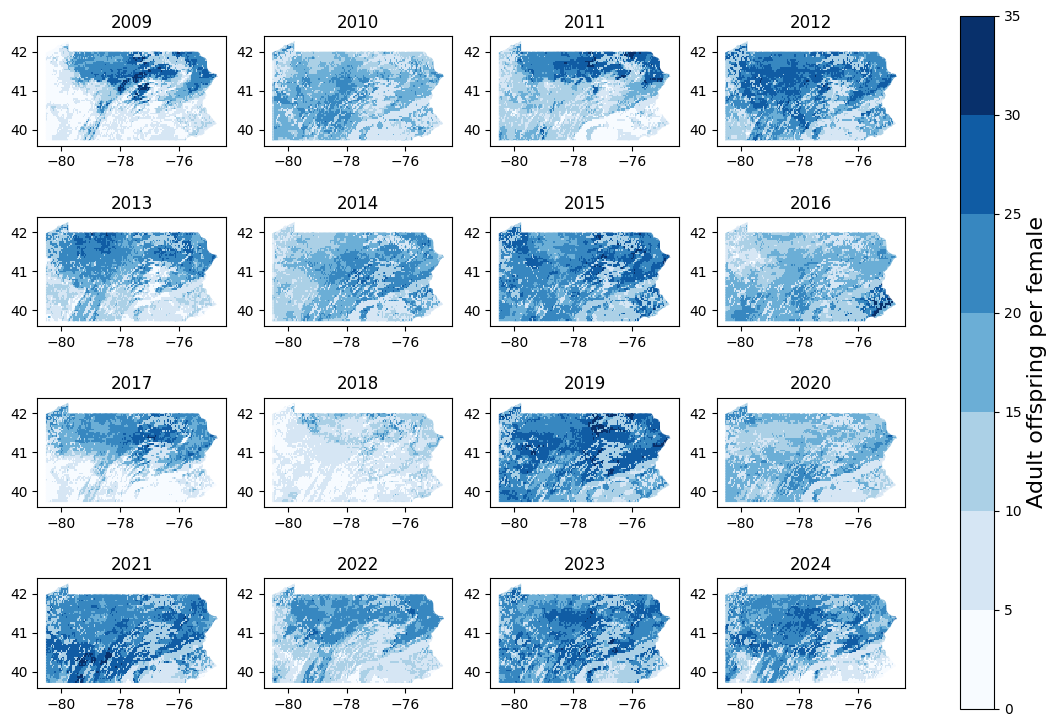

In [97]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
#bins = [0,1,2,4,8,12,16]
bins = [0,5,10,15,20,25,30,35]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
#cmap = plt.cm.get_cmap('Grays', len(bins) - 1)
#cmap = plt.cm.get_cmap('Grays', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(14, 9))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = 2008 + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'offsprings_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    #data1.plot(column='eggs_1_2023', cmap='Blues', legend=True, ax=ax)
    ax.set_title(str(year+1))  # Set the title of the subplot

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_label('Adult offspring per female', fontsize=16)  # label for the colorbar

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')

# Show the plots
plt.show()


In [99]:
offsprings = []
for i in range(num_years):
    offsprings.extend(data1[f'offsprings_{year}'])
print(np.max(offsprings))
print(np.min(offsprings))
print(np.mean(offsprings))
print(np.std(offsprings))
print(np.median(offsprings))

30.345
1.1537499999999998
16.716871812936127
7.234375229745552
19.215


In [107]:
data1.columns.tolist()

['Unnamed: 0',
 'col',
 'row',
 'grid_id',
 'emergence_2008',
 'emergence_2009',
 'emergence_2010',
 'emergence_2011',
 'emergence_2012',
 'emergence_2013',
 'emergence_2014',
 'emergence_2015',
 'emergence_2016',
 'emergence_2017',
 'emergence_2018',
 'emergence_2019',
 'emergence_2020',
 'emergence_2021',
 'emergence_2022',
 'emergence_2023',
 'egg_production_2008',
 'egg_production_2009',
 'egg_production_2010',
 'egg_production_2011',
 'egg_production_2012',
 'egg_production_2013',
 'egg_production_2014',
 'egg_production_2015',
 'egg_production_2016',
 'egg_production_2017',
 'egg_production_2018',
 'egg_production_2019',
 'egg_production_2020',
 'egg_production_2021',
 'egg_production_2022',
 'egg_production_2023',
 'egg_larvar_mortality_2008',
 'egg_larvar_mortality_2009',
 'egg_larvar_mortality_2010',
 'egg_larvar_mortality_2011',
 'egg_larvar_mortality_2012',
 'egg_larvar_mortality_2013',
 'egg_larvar_mortality_2014',
 'egg_larvar_mortality_2015',
 'egg_larvar_mortality_2016',

In [118]:
dy = data1[[ 'offsprings_2008',
 'offsprings_2009',
 'offsprings_2010',
 'offsprings_2011',
 'offsprings_2012',
 'offsprings_2013',
 'offsprings_2014',
 'offsprings_2015',
 'offsprings_2016',
 'offsprings_2017',
 'offsprings_2018',
 'offsprings_2019',
 'offsprings_2020',
 'offsprings_2021',
 'offsprings_2022',
 'offsprings_2023']]#.groupby('grid_id').mean()

In [119]:
dy_flipped = dy.transpose()
dy_flipped

,0,1,2,3,4,5,6,7,8,9,...,7442,7443,7444,7445,7446,7447,7448,7449,7450,7451
offsprings_2008,5.84100,4.9700,2.3075,1.7750,13.452,2.30100,1.77500,1.59750,3.22200,6.8780,...,14.8680,14.9520,6.0690,6.05200,6.05200,6.0520,6.05200,7.4340,13.45200,13.0980
offsprings_2009,9.63000,9.5400,11.7000,11.7000,19.080,11.70000,10.80000,10.80000,11.64225,10.4650,...,17.6500,18.2310,20.0575,10.02875,10.82750,19.8800,9.94000,8.1420,16.28400,17.8770
offsprings_2010,12.56500,12.5650,10.7700,8.9750,26.925,11.66750,8.97500,9.00000,8.16750,11.9275,...,12.5315,12.7080,6.3540,6.35400,6.35400,6.3540,6.35400,6.8835,6.26575,12.5315
offsprings_2011,13.35000,13.3500,12.4600,11.5700,24.920,12.46000,12.46000,12.46000,12.53000,23.4000,...,16.0200,17.8000,17.6715,7.94325,7.94325,17.4930,8.74650,8.7220,19.22400,20.8260
offsprings_2012,13.26675,13.5375,12.6700,12.6700,24.187,12.18375,11.76500,11.76500,12.64900,12.4780,...,15.1725,13.4625,13.4625,6.73125,6.10300,12.1720,6.08600,5.1765,10.35300,11.6025
offsprings_2013,6.15400,5.8825,6.1540,5.9730,12.308,6.24450,5.97300,5.97300,6.91600,12.5800,...,19.8000,19.8000,21.6000,10.80000,9.90000,19.8000,9.90000,9.7200,19.62000,14.2200
offsprings_2014,10.83000,12.6700,13.5750,12.6700,23.465,13.53750,13.57500,12.67000,12.77500,23.9850,...,23.2700,23.2700,23.3350,11.66750,11.63500,23.2700,12.53000,12.5300,26.85000,25.0600
offsprings_2015,9.31875,8.9000,8.0100,8.7220,15.265,7.63250,7.92100,8.72200,8.18800,15.2150,...,26.4750,24.7100,23.0100,10.62000,12.39000,24.7100,12.35500,12.3550,26.47500,28.2400
offsprings_2016,12.39000,12.3900,12.3900,12.3900,28.320,12.39000,10.62000,10.62000,11.53750,21.8990,...,6.3720,6.3900,6.3900,3.19500,2.39625,7.9875,4.88125,4.8950,7.98750,10.0605
offsprings_2017,9.95500,10.8600,5.4300,4.5125,18.100,4.52500,3.62000,3.62000,4.52500,18.2500,...,10.3240,10.3530,10.3530,5.80125,5.78500,9.9680,4.98400,4.9700,11.11950,9.8840


In [120]:
std_devs = dy_flipped.std()
print(std_devs)


0       2.479231
1       2.701773
2       3.321106
3       3.435323
4       5.460031
          ...   
7447    6.825016
7448    2.841902
7449    2.696061
7450    6.199389
7451    5.621912
Length: 7452, dtype: float64


In [121]:
np.mean(std_devs)

np.float64(5.162741640198184)

In [122]:
np.max(std_devs)

np.float64(9.205360621613817)

In [123]:
np.min(std_devs)

np.float64(1.6565417157408333)

In [60]:
# Sensitivity analysis

In [61]:
### extract the data for each year

years = []  
offsprings = []
col = []
row = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    years.extend([year] * len(data1[f"offsprings_{year}"].tolist()))
    offsprings.extend(data1[f"offsprings_{year}"].tolist())

df_pa = pd.DataFrame({'Year': years, 'offsprings': offsprings})

In [62]:
years = range(2008, 2024)
data1['total_offsprings'] = [sum([data1[f'offsprings_{year}'][i] for year in years]) for i in range(len(data1))]
data1['avg_offsprings'] = [np.mean([data1[f'offsprings_{year}'][i] for year in years]) for i in range(len(data1))]
data1['zeros_offsprings'] = [ len([data1[f'offsprings_{year}'][i] for year in years if data1[f'offsprings_{year}'][i] == 0 ]) for i in range(len(data1))]

In [63]:
data2 = data1.copy()

In [64]:
data2['geometry'] = gpd.points_from_xy(data2.lon, data2.lat)

In [65]:
pennsylvania_county1 = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/PA County Boundaries Spatial Data Current Transportation_20241020')
pennsylvania_county1 = pennsylvania_county1.to_crs('EPSG:4369')
data2 = pennsylvania_county1.sjoin(data2, how='inner')

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:2391: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4369
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [66]:
dt = data2[['county_nam', 'avg_offsprings']].groupby('county_nam', as_index=False).mean()

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [68]:
np.max(data1['avg_offsprings'].to_list())

np.float64(11.460625)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77381/136183244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


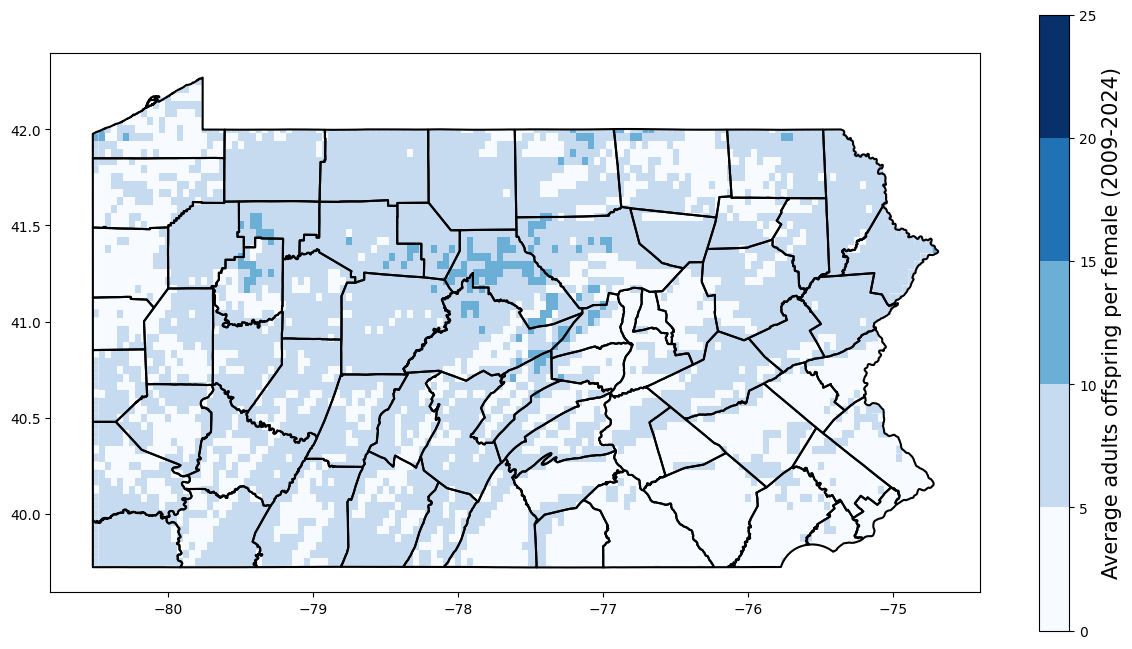

In [69]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
#bins = [0, 2, 4, 6, 8, 10, 14]
bins = [0,5,10,15,20,25]

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Create a colormap and normalization
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Plot data
data1.plot(column='avg_offsprings', cmap=cmap, norm=norm, ax=ax, legend=False)

# Plot boundary
pennsylvania_county.boundary.plot(ax=ax, color='black')

# Create colorbar
sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])  # Dummy array for colorbar
cbar = fig.colorbar(sm1, ax=ax, orientation='vertical')
cbar.set_label('Average adults offspring per female (2009-2024)', fontsize=15)

plt.show()


In [70]:
##### Long-term data analysis #####
############# Load Emperical Data #############

In [71]:
data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/doi_10_5061_dryad_9kd51c5mc__v20220727/Turley_et_al_ECOEVO_blue_vane_bee_collection_data.csv')

In [72]:
data_osmia = data[data['genus'] == 'Osmia']

In [73]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame for the site
site = gpd.GeoDataFrame(geometry=[Point(-77.254530, 39.935226)], crs='EPSG:4326')
#39.935226, −77.254530

In [74]:
# spatial join with data1
data1 = data1.to_crs('EPSG:4326')


In [75]:
data3 = data1.sjoin(site, how='inner', predicate='intersects')

In [76]:
# get offspring data from 2014 to 2019
offsprings = []
years = []
for i in range(2013, 2019):
    years.extend([i] * len(data3[f"offsprings_{i}"].tolist()))
    offsprings.extend(data3[f"offsprings_{i}"].tolist())

df_pa1 = pd.DataFrame({'Year': years, 'offsprings': offsprings})

Pearson Correlation: 0.28 (p-value: 0.5890)
Spearman Correlation: 0.26 (p-value: 0.6228)
R-squared: 0.08


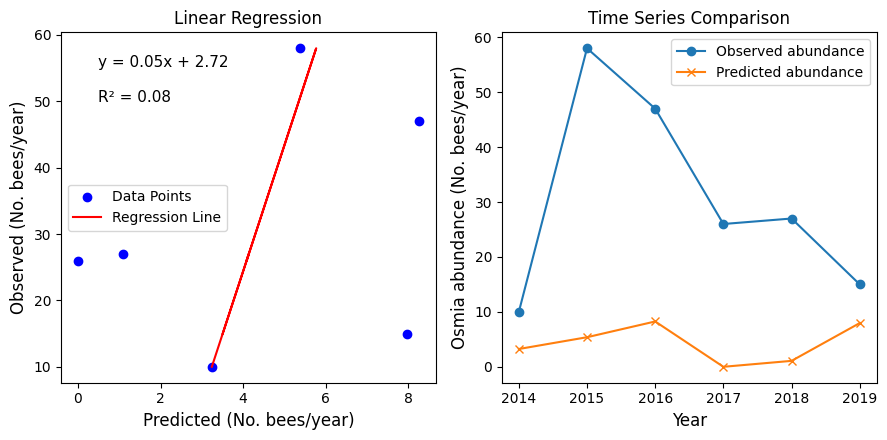

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Replace these with your actual data
years = np.array([2014, 2015, 2016, 2017, 2018, 2019])
osmia_abundance = np.array(data_osmia.groupby('year', as_index=False).count()['ID'].tolist()) 
#osmia_abundance = osmia_abundance/np.mean(osmia_abundance)

eggs_per_female = np.array(df_pa1['offsprings'].tolist()) 
#eggs_per_female = eggs_per_female/np.mean(eggs_per_female)

# Correlation Analysis
pearson_corr, pearson_p = pearsonr(osmia_abundance, eggs_per_female)
spearman_corr, spearman_p = spearmanr(osmia_abundance, eggs_per_female)

print(f"Pearson Correlation: {pearson_corr:.2f} (p-value: {pearson_p:.4f})")
print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_p:.4f})")

# Linear Regression
X = osmia_abundance.reshape(-1, 1)
y = eggs_per_female

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Goodness-of-Fit Metrics
r2 = r2_score(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f"R-squared: {r2:.2f}")
#print(f"RMSE: {rmse:.2f}")

# Plotting the original data and regression line
plt.figure(figsize=(9, 4.5))

plt.subplot(1, 2, 1)
plt.scatter( eggs_per_female, osmia_abundance, color='blue', label='Data Points')
plt.plot( predictions, osmia_abundance, color='red', label='Regression Line')
plt.ylabel("Observed (No. bees/year)", fontsize=12)
plt.xlabel("Predicted (No. bees/year)", fontsize=12)
plt.title("Linear Regression")
plt.legend()

# add regression equation to the plot
slope = model.coef_[0]
intercept = model.intercept_
plt.text(0.1, 0.9, f'y = {slope:.2f}x + {intercept:.2f}', transform=plt.gca().transAxes, fontsize=11)

# plot R-squared and RMSE
plt.text(0.1, 0.8, f'R² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=11)
#plt.text(0.1, 0.7, f'RMSE = {rmse:.2f}', transform=plt.gca().transAxes)

plt.subplot(1, 2, 2)
plt.plot(years, osmia_abundance, label='Observed abundance', marker='o')
plt.plot(years, eggs_per_female, label='Predicted abundance', marker='x')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Osmia abundance (No. bees/year)", fontsize=12)
plt.title("Time Series Comparison")
plt.legend()

plt.tight_layout()
plt.show()


In [78]:
np.array(data_osmia.groupby('year', as_index=False).count()['ID'].tolist()) 

array([10, 58, 47, 26, 27, 15])

In [79]:
np.array(df_pa1['offsprings'].tolist()) 

array([3.24   , 5.385  , 8.25375, 0.     , 1.08   , 7.965  ])

In [80]:
df_pa1

,Year,offsprings
0,2013,3.24000
1,2014,5.38500
2,2015,8.25375
3,2016,0.00000
4,2017,1.08000
5,2018,7.96500


In [81]:
dt = pd.DataFrame({
    "observed": np.array(data_osmia.groupby('year', as_index=False).count()['ID'].tolist()) , 
    "predicted": np.array(df_pa1['offsprings'].tolist()) ,
    'year' : [2014, 2015, 2016, 2017, 2018, 2019]
})

In [82]:
import pandas as pd
import statsmodels.formula.api as smf

# Your data
# df = pd.read_csv("your_data.csv")

# Ensure year is treated as a categorical variable
dt["year"] = dt["year"].astype(str)

# Fit the LMM: random intercept for year
# Log transformation example
dt['log_observed'] = np.log(dt['observed'] + 1)  # Adding 1 to avoid log(0)
model = smf.mixedlm("observed ~ predicted", data=dt, groups=dt["year"])

#model = smf.mixedlm("observed ~ predicted", data=dt, groups=dt["year"])
result = model.fit()
print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: observed
No. Observations: 6       Method:             REML    
No. Groups:       6       Scale:              198.1432
Min. group size:  1       Log-Likelihood:     -20.5849
Max. group size:  1       Converged:          Yes     
Mean group size:  1.0                                 
------------------------------------------------------
             Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    23.999   12.222 1.964 0.050  0.044 47.953
predicted     1.505    1.146 1.313 0.189 -0.741  3.750
Group Var   198.143                                   



/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [83]:
# Predict values using the fitted model
dt["fitted"] = result.fittedvalues


In [84]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# R²
r2 = r2_score(dt["observed"], dt["fitted"])

# RMSE
rmse = np.sqrt(mean_squared_error(dt["observed"], dt["fitted"]))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R²: 0.770
RMSE: 8.127


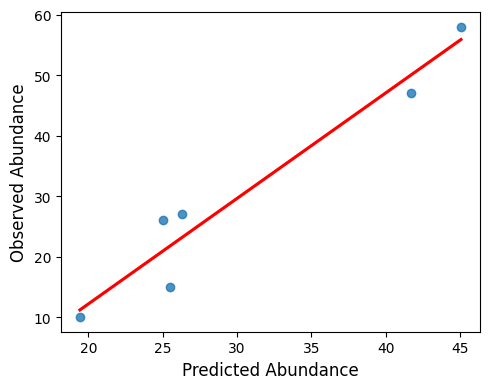

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.regplot(x="fitted", y="observed", data=dt, ci=None, line_kws={"color": "red"})

plt.xlabel("Predicted Abundance", fontsize=12)
plt.ylabel("Observed Abundance", fontsize=12)
#plt.title(f"Observed vs. Predicted\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
#plt.text(25, 50, f"R² = {r2:.2f}", fontsize=12 )
#plt.grid(True)
plt.tight_layout()
plt.show()


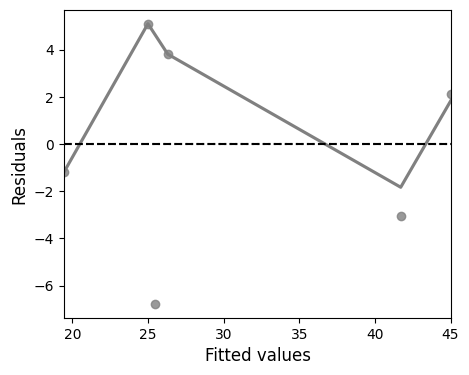

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.residplot(x=result.fittedvalues, y=dt['observed'], lowess=True, color='gray')
plt.xlabel("Fitted values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
#plt.title("Residuals vs Fitted")
plt.axhline(0, color='black', linestyle='--')
plt.show()


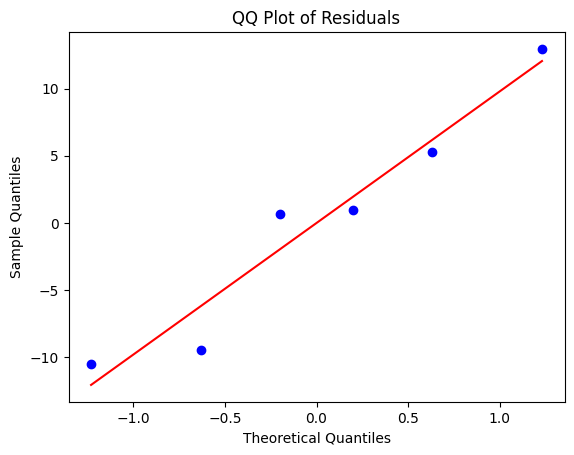

In [87]:
# check normality of residual
residuals = result.resid

import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a QQ plot
stats.probplot(residuals, dist="norm", plot=plt)

# Add labels and title
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Residuals")

# Show the plot
plt.show()
# make qq plot 

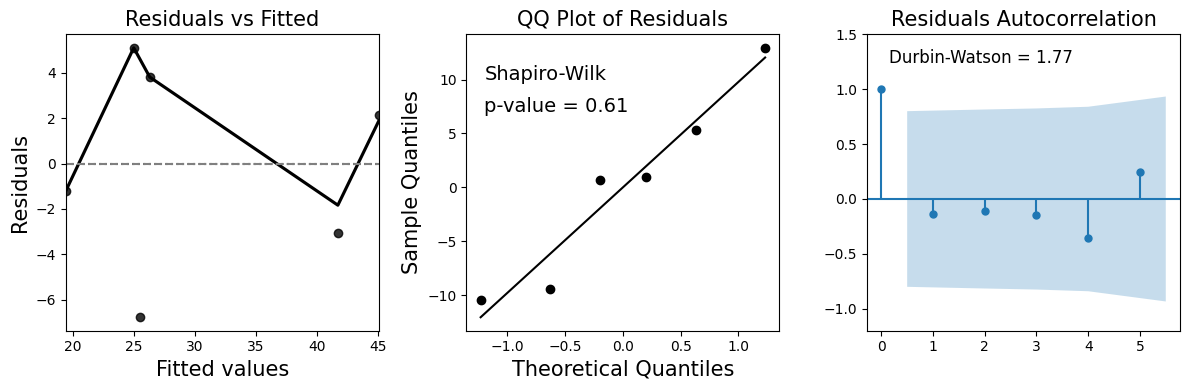

In [88]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.residplot(x=result.fittedvalues, y=dt['observed'], lowess=True, color='black')
plt.xlabel("Fitted values", fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.title("Residuals vs Fitted", fontsize=15)
plt.axhline(0, color='gray', linestyle='--')

plt.subplot(1, 3, 2)
# Create a QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('black') 
plt.gca().get_lines()[1].set_color('black') 
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Sample Quantiles", fontsize=15)
plt.title("QQ Plot of Residuals", fontsize=15)
p_value = stats.shapiro(residuals)[1]  # Shapiro-Wilk test for normality
plt.text(-1.2, 10, f"Shapiro-Wilk", fontsize=14)
plt.text(-1.2, 7, f"p-value = {p_value:.2f}", fontsize=14)
#plt.text(-1.2,10, f"p-value = {p_value:.4f}", fontsize=14)

ax = plt.subplot(1, 3, 3)
plot_acf(result.resid, lags=5, ax=ax)
# Additional plot
# Add your code for the third plot here
plt.ylim(-1.2, 1.5)
import statsmodels.api as sm
durbin_watson = sm.stats.durbin_watson(result.resid)
plt.text(0.07, 0.95, f'Durbin-Watson = {durbin_watson:.2f}', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=12)

plt.title("Residuals Autocorrelation", fontsize=15)

plt.tight_layout()
plt.show()

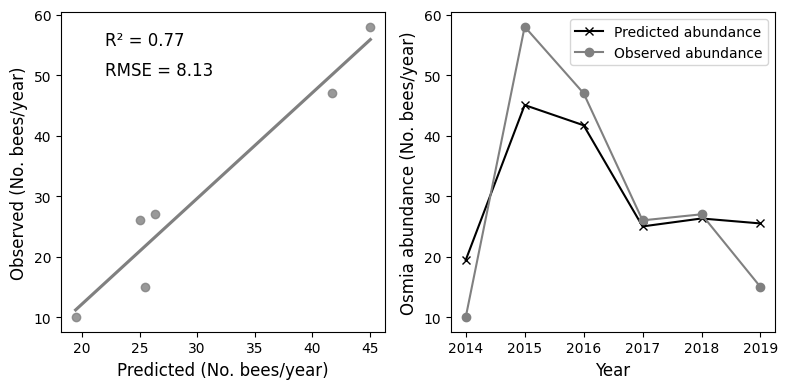

In [121]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.regplot(x="fitted", y="observed", data=dt, ci=None, color='gray', line_kws={"color": "gray"})
plt.xlabel("Predicted (No. bees/year)", fontsize=12)
plt.ylabel("Observed (No. bees/year)", fontsize=12)
#plt.title(f"Observed vs. Predicted\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
plt.text(22, 55, f"R² = {r2:.2f}", fontsize=12 )
plt.text(22, 50,f"RMSE = {rmse:.2f}", fontsize=12 )

plt.subplot(1, 2, 2)
ax = plt.plot(dt['year'], dt['fitted'], color='black', marker='x')
plt.plot(dt['year'], dt['observed'], color='gray', marker='o')

# add legend
plt.legend(['Predicted abundance', 'Observed abundance'])
plt.ylabel("Osmia abundance (No. bees/year)", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.tight_layout()
plt.show()


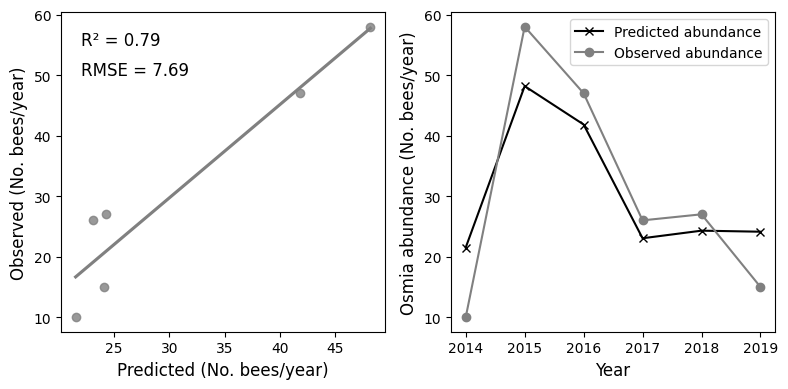

In [48]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.regplot(x="fitted", y="observed", data=dt, ci=None, color='gray', line_kws={"color": "gray"})
plt.xlabel("Predicted (No. bees/year)", fontsize=12)
plt.ylabel("Observed (No. bees/year)", fontsize=12)
#plt.title(f"Observed vs. Predicted\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
plt.text(22, 55, f"R² = {r2:.2f}", fontsize=12 )
plt.text(22, 50,f"RMSE = {rmse:.2f}", fontsize=12 )

plt.subplot(1, 2, 2)
ax = plt.plot(dt['year'], dt['fitted'], color='black', marker='x')
plt.plot(dt['year'], dt['observed'], color='gray', marker='o')

# add legend
plt.legend(['Predicted abundance', 'Observed abundance'])
plt.ylabel("Osmia abundance (No. bees/year)", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.tight_layout()
plt.show()
